In [1]:
import numpy as np
import matplotlib.pyplot as plt
import denn.utils as ut

In [2]:
# plt.rc('axes', titlesize=20) # 15
# plt.rc('axes', labelsize=20) # 12
# plt.rc('legend', fontsize=20) # 12
# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=15)

In [3]:
folder = lambda i: f"/Users/dylanrandle/Downloads/COO_run_gan_besthype_052220_seed{i}/val_mse.npy"
gan_reps = []
for i in range(5):
    gan_reps.append(np.load(folder(i)))
gan_reps = np.vstack(gan_reps)

In [4]:
# gan_reps1 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps.npy')
# gan_reps2 = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps_n200.npy')
# gan_reps = np.load('/Users/dylanrandle/Downloads/coo_gan_rand_reps_n400.npy')

# l2_reps = np.load('/Users/dylanrandle/Downloads/coo_mse_rand_reps_n400.npy')
l2_reps = np.load('/Users/dylanrandle/Downloads/coo_reps_052320_mse.npy')

# l1_reps = np.load('/Users/dylanrandle/Downloads/coo_l1_rand_reps_n400.npy')
l1_reps = np.load('/Users/dylanrandle/Downloads/coo_reps_052320_l1.npy')

# huber_reps = np.load('/Users/dylanrandle/Downloads/coo_huber_rand_reps_n400.npy')
huber_reps = np.load('/Users/dylanrandle/Downloads/coo_reps_052320_huber.npy')

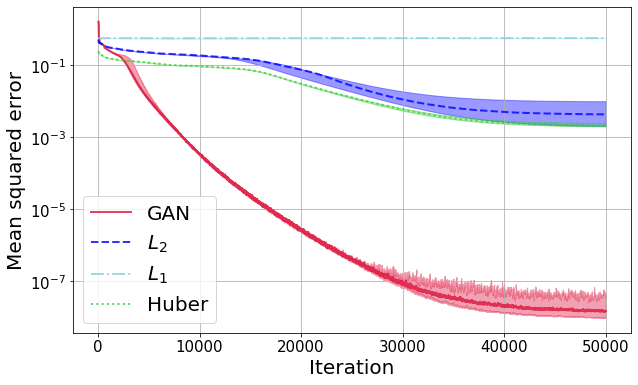

In [7]:
arrs_dict = {
    "GAN": gan_reps, 
    "$L_2$": l2_reps,
    "$L_1$": l1_reps,
    "Huber": huber_reps,
#     "RK4": mse*np.ones_like(gan_reps)
}
ut.plot_reps_results(arrs_dict, fname="coo_rand_reps_big.jpg", # 
                     window=50, figsize=(10,6), pctiles=(25,75))

In [8]:
print(f"L1 Min: {np.min(l1_reps)}")
print(f"L2 Min: {np.min(l2_reps)}")
print(f"Huber Min: {np.min(huber_reps)}")
print(f"GAN Min: {np.min(gan_reps)}")

L1 Min: 0.5622193813323975
L2 Min: 6.354163633659482e-05
Huber Min: 0.0018486438784748316
GAN Min: 7.850697869571377e-09


# RK4

In [25]:
from denn.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def coo_deriv(t, xy):
    """ 
    dxdt = -ty
    dydt = tx
    """
    x, y = xy[0], xy[1]
    
    rhs1 = -t*y
    rhs2 = t*x
    return np.array([rhs1, rhs2])
    return rhs

In [27]:
t, sol = rk4(coo_deriv, [0, 6.28], [1, 0], 800)

In [28]:
from denn.problems import CoupledOscillator
import torch
sir_sol = CoupledOscillator(x0=1, y0=0, n=800).get_solution(torch.tensor(t))

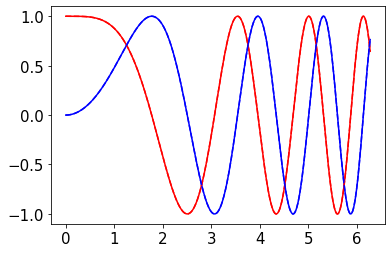

In [29]:
plt.plot(t, sol[:,0], color='red')
plt.plot(t, sol[:,1], color='blue')

plt.plot(t, sir_sol[:,0], '--', color='red')
plt.plot(t, sir_sol[:,1], '--', color='blue')

In [30]:
mse = np.mean( (sol - sir_sol.numpy())**2 )
mse

2.0921245e-09